<h3 style="color:navy;">MIET2039_CL08-Numerical-Simulations-of-Fins</h3>

Transient 1D equation:<br>
:================================================
$$ \frac{\partial ^2 T}{\partial x^2}  = \frac{1}{\alpha} \frac{\partial T}{\partial t} $$

Discretize the transient term:<br>
:================================================
$$ \frac{\partial T}{\partial t} = \frac{T_i^{n+1} - T_i^n} {\Delta t}  $$ 
* i: index of grid in space;
* n: index of grid in time;

:================================================<br>
Discretise the diffusion term (EXPLICIT method):
:================================================
<img src="img/FD-explicit-stencil.png" width="350px">

$$\frac{\partial^2 T}{\partial x^2} = \frac{T_{i+1}^n-2T_i^n+T_{i-1}^n}{\Delta x^2 }$$

Put the two terms together and re-arrange the equation so it is $T_i^{n+1} = ....$

\begin{align}
\frac{T_{i+1}^n-2T_i^n+T_{i-1}^n}{\Delta x^2 } &= \frac{T_i^{n+1} - T_i^n} {\alpha \Delta t} \\
 T_i^{n+1} &= T_i^{n}+\frac{\alpha  \Delta t}{\Delta x^2}(T_{i+1}^n-2T_i^n + T_{i-1}^n) 
\end{align}


:================================================<br>
We can also discretise the diffusion term using the IMPLICIT method:
:================================================
<img src="img/FD-implicit-stencil.png" width="350px">

$$\frac{\partial^2 T}{\partial x^2} = \frac{T_{i+1}^{n+1}-2T_i^{n+1}+T_{i-1}^{n+1}}{\Delta x^2 }$$

Discretised equation using the implicit method:
$$  T_i^{n+1} = T_i^{n}+\frac{\alpha  \Delta t}{\Delta x^2}(T_{i+1}^{n+1}-2T_i^{n+1} + T_{i-1}^{n+1}) $$


We can re-write the equations using the 'mesh Fourier number'
$$ \tau = \frac{\alpha  \Delta t}{\Delta x^2} $$

Explicit Method ======================<br>
$$  T_i^{n+1} = T_i^{n}+\tau(T_{i+1}^{n}-2T_i^{n} + T_{i-1}^{n}) $$

Implicit Method ======================<br>
$$  T_i^{n+1} = T_i^{n}+\tau(T_{i+1}^{n+1}-2T_i^{n+1} + T_{i-1}^{n+1}) $$

1D Model with heat flux on one wall

Flux boundary
$$T_i^{n+1} =  (1-\tau)T_{i}^n + \tau T_{i+1}^n + \frac{\tau\dot{q}\Delta x}{k}$$

<h4 style="color:#7171C6;">Exercise 8.1 1D transient solution using Explicit Time Discretisation</h4>
An aluminium horizontal bar( $\rho = 2700$kg/m3; $C_p = 900 $J/kgK ) of length 20cm has been heated to a uniform temperature of 100oC throughout the bar due to the left subjected to T(0) = 100$^\circ$C. The right hand side is now set to a temperature of 10$^\circ$C. Model the transient cooling effect on the temperature distribution and determine how long it takes to reach a steady state.  

In [ ]:
# load up  the modules we need
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

# Define the material properties
k = 237
rho = 2300
Cp = 900
alpha = k/(rho*Cp)
length = 0.2

# Set the number of nodes
nx = 21

# Calculate the dx - careful here and remember the stability criterion
dx = length/(nx-1)

# Set your timesteps 
tSteps = 1000

# set the time step size - careful here and remember the stability criterion
dt = 0.4

# calculate tau and check that it is below 0.5
tau = alpha*dt/(dx*dx)
print('Mesh Fourier Number is ', tau)

# initialise the nodes to 100oC
T = np.ones(nx) * 100

# define the right boundary condition to 0oC
T[-1]=0

# we will use np.mod(a,b)==0 to plot every b time step
plotEvery_n = 200

# set a timer counter
timeElapsed=0

# create a x-axis using np.linspace to plot T against
x=np.linspace(0,length,nx)

#********************
# ITERATION FOR LOOP
#********************
for n in range(tSteps):  #iterate through time
    Tn = T.copy()      #copy the existing values of u into un
    
    # use another for loop to step through the nodes
    for i in range(1,nx-1):
        T[i] = Tn[i] + tau*(n[i+1]-2*Tn[i]+Tn[i-1])
    
    # increment timer count
    timeElapsed += dt    
    
    # plot every n time steps
    if np.mod(n, plotEvery_n) == 0:
        plt.plot(x*100,T)

#Plot details
plt.xlabel('bar length(cm)')
plt.ylabel('Temperature (oC)')
plt.title('Temperature distribution')
print('time elapsed is %0.4f' % timeElapsed, 'secs')

# Discussion
#1. Did you observe the effect when the mesh-fourier-number (tau) > 0.5?
#2. We know that if the thermal conductivity is increased then the heat transfer
#   rate increases. Re-run the simulations and see how long it takes to converge
#   with different conductivities

<h4 style="color:#7171C6;">Exercise 8.2 2D transient solution using Explicit Time Discretisation</h4>
A rectangular block of x = 20cm, and y = 40cm is subjected to fixed temperature boundary conditions of T_bottom = 100oC; T_top = 50; T_left = 80; and T_right = 60. If the initial internal body is at room temperature of Ti = 20oC, how long will it take to reach steady state?

In this problem, the geometry and material property are given.

mesh fourier number is 0.1291


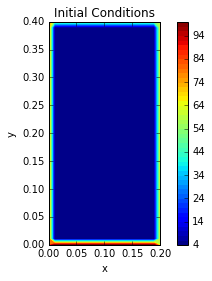

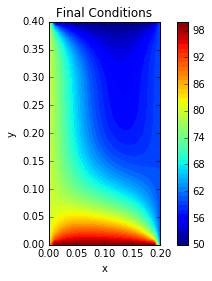

time simulated is 500


In [42]:
# 2D Transient
# Last week's study example ran a 2D problem using np.meshgrid

import numpy
from matplotlib import pyplot
%matplotlib inline

###variable declarations
xLength = 0.2;   nx = 20;       dx = xLength/(nx-1)
yLength = 0.4;   ny = 40;       dy = yLength/(ny-1)

# in our discretization formulation we set dx = dy, 
# therefore our in this section we must set our mesh to dx = dy as well

# define the thermal diffusivity alpha. some common values are given below
# water = 0.143e-6; steel ; aluminium 9.7e−5; steel 4.2e−6; copper 1.11e−4
alpha = 0.143e-4

# set the time step - *** change this value and see its effect ***
dt = 1

# set the total number of time steps
nt = 500

# calculate tau and check that it is below 0.5
tau = alpha*dt/dx**2  
print('mesh fourier number is %0.4f' % tau)

# meshgrid for 2D countour plot
x = np.linspace(0,xLength,nx)
y = np.linspace(0,yLength,ny)
X,Y = np.meshgrid(x,y)

# set initial temperature across the nodes to 5oC
T = np.ones((ny,nx))*5 ##create a 1xn vector of 1's

# set the temperature values at the boundaries
T[0,:]=100
T[-1,:]=50
T[:,0]=80
T[:,-1]=60

# Plot the initial temperature profiles
cp = plt.contourf(X, Y, T,50)
plt.colorbar(cp)
plt.title('Initial Conditions')
plt.xlabel('x');     plt.ylabel('y')
plt.axes().set_aspect('equal')
plt.show()

#******************
# SOLVER FOR LOOP
#******************
for n in range(nt+1): 
    Tn = T.copy()
    T[1:-1,1:-1]=Tn[1:-1,1:-1]+alpha*dt/dx**2*(Tn[1:-1,2:]-2*Tn[1:-1,1:-1]+Tn[1:-1,0:-2])+\
                                alpha*dt/dy**2*(Tn[2:,1:-1]-2*Tn[1:-1,1:-1]+Tn[0:-2,1:-1])
    
# Plot final solution
cp = plt.contourf(X, Y, T,50)
plt.colorbar(cp)
plt.title('Final Conditions')
plt.xlabel('x')
plt.ylabel('y')
plt.axes().set_aspect('equal')
plt.show() 
print('time simulated is', nt*dt, 's')